# Mathematical Foundations

The linear model is often the first model we learn modeling modeling data. Given a vector of inputs $X^T = (X_1, X_2, \ldots, X_p)$, we can predict the output Y with the following model:

$$\hat Y = \hat \beta_0 + \sum_{j=1}^p X_j \hat \beta_j$$

According to this notation, $X^T$ is a row vector and $X$ is a column vector. What we want to do is choose the coefficients $\beta$ to minimize what is called the *residual sum of squares:*

$$RSS(\beta) = \sum_{i=1}^N (y_i - x_i^T \beta)^2$$

In matrix form:

$$
\begin{equation}
    RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta)
\end{equation}
$$

where $\textbf{X}$ is an $N \times p$ matrix with each row being an input vector and $\textbf{y}$ is an $N$--vector of the outputs. If we differentiate with respect to $\beta$, then we obtain the following equation:

$$\textbf{X}^T (\textbf{y} - \textbf{X} \beta) = 0$$

So long as $\textbf{X}^T \textbf{X}$ is *nonsingular*, then the unique solution is given by the follwing equation which takes advantage of what's called the *pseudo-inverse*:

$$\hat \beta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

That is to say the prediction value of the $i^{th}$ input $x_i$ is $\hat y_i = \hat y(x_i) = x_i^T \hat \beta$

# Practice With Example

Say we generated our own data using the following rules:

$$y = 5 + 4x_1 + 3x_2 − 2x_3 + \epsilon$$

with $\epsilon \sim \mathcal{N}(0, 0.5^2)$, $x_1 \sim \mathcal{U}(0, 4)$, $x_2 \sim \mathcal{U}(1, 4)$, $x_3 \sim \mathcal{N}(3, 0.4^2)$, $𝑁 = 20$

$\mathcal{N} \rightarrow$ Normal Distribution and $\mathcal{U} \rightarrow$ Uniform Distribution

# Preamble

In [104]:
import numpy as np
from matplotlib import pyplot as plt

# Constants
np.random.seed(44)
N = 20
p = 3

# Define Data Generating Function

In [105]:
def y(x1, x2, x3):
    return 5 + 4*x1 + 3*x2 - 2*x3 + np.random.normal(0,scale=0.5)

# Generate Input Data

In [106]:
X = [[1, np.random.uniform(0, 4), np.random.uniform(1,4), np.random.normal(3, scale=0.4)] for _ in range(N)]
X = np.array(X)
X

array([[1.        , 3.33936859, 1.31438831, 2.69975411],
       [1.        , 1.43724335, 2.82771514, 3.52654293],
       [1.        , 1.5751182 , 2.22721783, 3.74351348],
       [1.        , 3.8421049 , 2.36986333, 3.03503519],
       [1.        , 1.71060608, 1.3403911 , 2.52663634],
       [1.        , 2.54732806, 1.41743876, 3.24217837],
       [1.        , 1.83481628, 3.62158956, 3.33026594],
       [1.        , 3.45069734, 1.44654419, 2.51607458],
       [1.        , 2.25179983, 1.47746579, 2.91483235],
       [1.        , 3.17829966, 3.97246804, 2.43540034],
       [1.        , 3.2200688 , 2.13224622, 2.71767879],
       [1.        , 2.84438274, 1.21752344, 3.01007254],
       [1.        , 3.53044633, 3.17817346, 3.20816395],
       [1.        , 2.78971967, 3.79030841, 3.33008896],
       [1.        , 3.526691  , 1.28491595, 2.79435513],
       [1.        , 0.43589402, 1.46120338, 1.77052447],
       [1.        , 3.93713613, 1.81468046, 2.84193637],
       [1.        , 1.22969024,

# Generate Output Data

In [107]:
y = [y(X[i][1], X[i][2], X[i][3]) for i in range(N)]
y = np.array(y)
y

array([17.11718468, 12.61417894, 11.49941045, 22.09382466, 11.33962392,
       13.67994053, 16.56791356, 18.15543755, 12.3698036 , 24.91013347,
       19.3981462 , 14.00029869, 22.23957398, 20.55036089, 18.17014326,
        7.59544376, 20.78941751, 11.25433856, 12.3054156 , 15.84934396])

# Fit Model (Find $\hat \beta$)
$$\hat \beta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

In [108]:
beta_hat = (np.linalg.inv(X.T @ X) @ X.T) @ y
RSS = np.sum( (y - X @ beta_hat)**2 )
sigma2_hat =  RSS/ (N - p - 1)

$\hat \beta$ = `[ 4.66154677,  3.96733899,  2.93094973, -1.7340953 ]`

$\hat \sigma^2$ = `0.22029835649942817`

$RSS$ = `3.5247737039908507`

# Using Software Package Instead

In [111]:
# Import Package
from sklearn.linear_model import LinearRegression

# Fit Model
lm = LinearRegression(fit_intercept = False).fit(X, y)
print(f'beta_sklearn = {lm.coef_}')

beta_sklearn = [ 4.66154677  3.96733899  2.93094973 -1.7340953 ]


These match the values above exactly!

# Generate Testing Data

In [112]:
sample_size = 30
X_test = [[1, np.random.uniform(0, 4), np.random.uniform(1,4), np.random.normal(3, scale=0.4)] for _ in range(sample_size)]
X_test = np.array(X_test)

# Define Objective and Prediction Functions

In [113]:
def true(x1, x2, x3):
        return 5 + 4*x1 + 3*x2 - 2*x3
    
def y_pred(x1, x2, x3):
    return beta_hat[0] + beta_hat[1] * x1 + beta_hat[2] * x2 + beta_hat[3] * x3

# Find True Values and Prediction Values

In [114]:
true_values = [true(X_test[i][0], X_test[i][1], X_test[i][2]) for i in range(sample_size)]
prediction = np.array([y_pred(X_test[i][0], X_test[i][1], X_test[i][2]) for i in range(sample_size)])

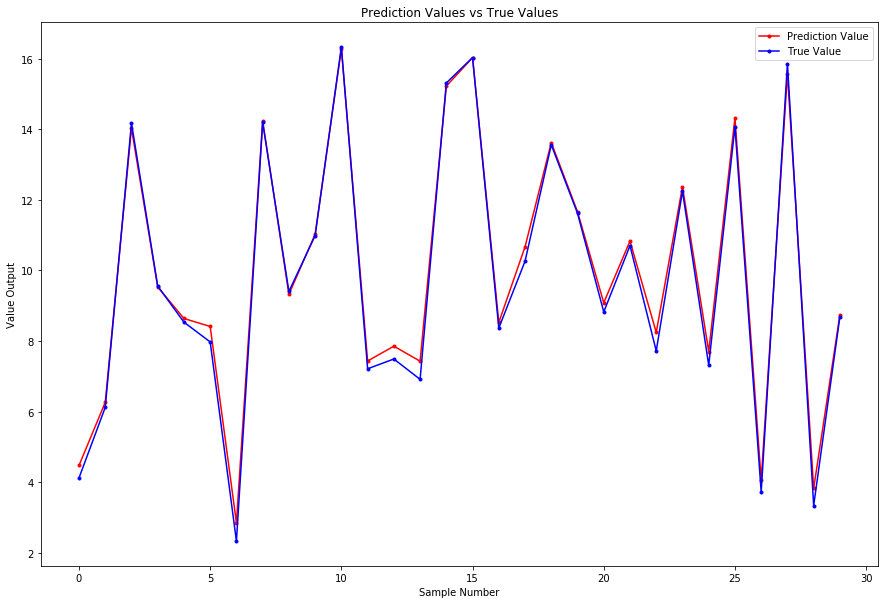

In [115]:
plt.figure(figsize = (15,10))
plt.plot(prediction, 'r.-', label='Prediction Value')
plt.plot(true_values, 'b.-', label='True Value')
plt.title("Prediction Values vs True Values")
plt.xlabel("Sample Number")
plt.ylabel("Value Output")
plt.legend()
plt.show()

# Confidence Interval for $\hat \beta$

### Method A

In [122]:
var_beta = np.diag(sigma2_hat * np.linalg.inv(X.T.dot(X)))
beta_interval = np.c_[beta_hat - 2 * np.sqrt(var_beta), beta_hat + 2 * np.sqrt(var_beta)]
print(f'beta_interval = \n {beta_interval}')

beta_interval = 
 [[ 3.14015149  6.18294205]
 [ 3.75728708  4.17739091]
 [ 2.68151721  3.18038224]
 [-2.2568224  -1.21136821]]


### Method B

In [124]:
# Covariance Matrix
C = np.linalg.inv(X.T @ X)
# Use 2.12 for the t statistic (alpha = 0.05)
[(beta_hat[j] - 2.12 * np.sqrt(C[j][j]*sigma2_hat), beta_hat[j] + 2.12 * np.sqrt(C[j][j]*sigma2_hat)) for j in range(p + 1)]

[(3.0488677750829836, 6.274225771421724),
 (3.744683963613348, 4.189994020603161),
 (2.666551261253546, 3.1953481918120534),
 (-2.2881860233567006, -1.180004584058294)]